# Projeto 2 - Ciência dos Dados

**Alunos:** Eduardo Papandrea Santa, Ivan da Alcantara Barbosa Barros, Mariana Barbosa Sousa


## Contextualização:

A violência policial contra negros nos Estados Unidos, foi motivo de muitos protestos no ano de 2020, motivados por casos que ganharam repercussão nacional, como o caso de George Floyd que foi morto asfixiado por policiais. Apesar de o número de mortes absoluta por policiais ser a maioria de brancos, o índice de óbitos entre negros é maior que o dobro da taxa entre brancos, sendo que os negros são a minoria no país (cerca de 13%) (fonte: [folha uol](https://www1.folha.uol.com.br/mundo/2020/09/lembre-os-casos-recentes-de-violencia-policial-contra-negros-nos-eua.shtml)).
Com base nisso, nosso projeto tem como intuito responder a seguinte pergunta: "*A raça de um suspeito em uma abordagem influencia na atitude do policial?*".

## Objetivo:

O dataset usado para a base de dados foi extraído da platorma *Kaggle* e contém informações, de vários anos, de situações policiais da cidade americana de Mineapolis, como data do ocorrido, raça, sexo e idade do indíviduo, distrito policial, bairro em que ocorreu a situação. O objetivo do projeto é responder a seguinte pergunta: "*A raça de um suspeito em uma abordagem influencia na atitude do policial?*".
Para responder essa pergunta iremos usar alguns modelos de predição – Regressão Logística, Random Forest e Decision Tree –, com base nos resultados obtidos será possível deduzir qual modelo é o melhor pra realizar nossa previsão e conseguiremos responder nossa pergunta.

## Ferramenta utilizadas:

Utilizaremos bibliotecas prontas disponíveis, a príncipio são elas: a biblioteca pandas, a matplotli.pyplot, a numpy, a scipy e a biblioteca scikit-learn, uma biblioteca própria para *machine learning*. Ao longo do documento, se houverem novas bibliotecas, elas serão mencionadas.


In [298]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\programdata\anaconda3\lib\site-packages (0.23.2)


## Dataset:

O dataset utilizado foi o *police_use_force.csv* obtido na plataforma *Kaggle*.

In [299]:
# Rodando o dataset
police0 = pd.read_csv('police_use_of_force.csv')
police0.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
0,-93.273141,44.980808,15928382,08-000149,2008/01/01 01:29:47+00,Code 3,No,MISC,NaN,1,...,322402,46998.0,23458,17121,44.980808,-93.273141,-1.038312e+07,5.618501e+06,2020/11/02 08:18:49+00,1
1,-93.251092,44.961813,15928383,08-012774,2008/01/13 03:21:52+00,Suspicious Vehicle,No,FLEE,No,2,...,322402,84018.0,10316,17023,44.961813,-93.251092,-1.038066e+07,5.615512e+06,2020/11/02 08:18:49+00,2
2,-93.266112,44.974295,15928384,08-019237,2008/01/20 03:47:57+00,Unwanted Person,Yes,OBSTRU,No,3,...,322402,46998.0,23458,21739,44.974295,-93.266112,-1.038234e+07,5.617476e+06,2020/11/02 08:18:49+00,3
3,-93.295639,45.000883,15928385,08-030704,2008/02/01 06:15:20+00,Attempt Pick-Up,No,CHLDAB,NaN,2,...,322402,80434.0,15344,22445,45.000883,-93.295639,-1.038562e+07,5.621661e+06,2020/11/02 08:18:49+00,4
4,-93.290726,45.013029,15928386,08-038956,2008/02/09 03:49:09+00,Neighbor Trouble,Yes,OBSTRU,Yes,2,...,322402,80434.0,13679,25902,45.013029,-93.290726,-1.038508e+07,5.623573e+06,2020/11/02 08:18:49+00,5


In [300]:
police0.shape

(33257, 30)

# Minerando dados

O dataset precisará ser filtrado, uma vez que precisamos remover variáveis indesejadas para o modelo, e, assim, ter um modelo mais preciso, sem a interferência de dados que não são úteis para a previsão.

In [301]:
# Filtrando o dataset para remover entradas indesejdas cujos resultados não são proveitosos para o modelo:
police1 = police0.drop(columns=['X', 'Y', 'ForceTypeAction', 'PoliceUseOfForceID', 'CaseNumber', 'ResponseDate', 'ForceReportNumber', 'SubjectRole', 'SubjectRoleNumber', 'CenterGBSID', 'OBJECTID', 'DateAdded', 'CenterX', 'CenterY', 'CenterLatitude', 'CenterLongitude'])

**Variáveis retiradas**
* Dados relacionados a latitude e longitude foram desconsiderados, uma vez que para a análise os dados de localização baseado em distrito policial e bairro são mais proveitosos para que a análise não se torne muito complexa, uma vez que o intuito do modelo não é ver atitudes policiais em pontos muito específicos.
* As features PoliceUseOfForceID, CaseNumber, ResponseDate, ForceReportNumber, SubjectRole, SubjectRoleNumber, CenterGBSID, OBJECTID, DateAdded foram desconsideradas por se tratarem de códigos policiais que não são necessários para a análise.
* A feature ForceTypeAction foi desconsiderada pois será considerado os casos genéricos de "agressões" na feature ForceType.

In [302]:
police1.head()

,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceType,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
0,Code 3,No,MISC,NaN,Bodily Force,White,Male,39.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
1,Suspicious Vehicle,No,FLEE,No,Bodily Force,Black,Male,30.0,Fled in Vehicle,03,Ventura Village,322402,84018.0,10316
2,Unwanted Person,Yes,OBSTRU,No,Bodily Force,Black,Male,40.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
3,Attempt Pick-Up,No,CHLDAB,NaN,Bodily Force,Black,Female,35.0,Commission of Crime,04,Jordan,322402,80434.0,15344
4,Neighbor Trouble,Yes,OBSTRU,Yes,Bodily Force,Black,Male,46.0,Tensed,04,Hawthorne,322402,80434.0,13679


**Descrevendo variáveis restantes**

* `Problem`: Tipo de problema
* `Is911Call`: se o caso foi denúncia por ligação
    - No: Não foi denúncia por ligação
    - Yes: foi denúncia por ligação
* `PrimaryOffense`: Qual a primeira passagem pela polícia
* `SubjectInjury`: Se o indivíduo já estava machucado antes da intervenção policial
    - No: Não estava machucado
    - Yes: Estava machucado
* `ForceType`: Tipo de agressão
    - Bodily Force                  
    - Taser                         
    - Chemical Irritant              
    - Gun Point Display              
    - Improvised Weapon              
    - Police K9 Bite                 
    - Baton                          
    - Firearm                       
    - Maximal Restraint Technique    
    - Less Lethal Projectile         
    - Less Lethal      
* `Race`: Tipo de raça
* `Sex`: Tipo de sexo
* `EventAge`: Idade do indivíduo
* `TypeOfResistance`: Tipo de crime cometido
* `Precinct`: Distrito Policial da ocorrência
    - 01
    - 02
    - 03
    - 04
    - 05
* `Neighborhood`: Bairro da ocorrência
* `TotalCityCallsForYear`: Total de ligação por ano da cidade
* `TotalPrecinctCallsForYear`: Total de ligações por ano do distrito
* `TotalNeighborhoodCallsForYear`: Total de ligações por ano do bairro

**Iremos usar a variável *ForceType* como target, pois ela nos dá os tipos de força usada por policiais. Desse modo, podemos estudar sua relação com as outras variáveis.**

## Comparando antes e depois da remoção de Nan

**A limpeza de dados com informação *Nan* serão desconsiderados, a fim de tornar o modelo mais preciso. Essa limpeza não interferirá significativamente na quantidade de informação da base da dados, uma vez que ainda continuaremos com bastante informação**

In [303]:
# Fazendo limpeza para tirar os resultados indeterminados (Nan)
police2 = police1.copy()
police2.dropna(inplace=True)
police2.shape

(19262, 14)

In [304]:
police2.head()

,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceType,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
1,Suspicious Vehicle,No,FLEE,No,Bodily Force,Black,Male,30.0,Fled in Vehicle,03,Ventura Village,322402,84018.0,10316
2,Unwanted Person,Yes,OBSTRU,No,Bodily Force,Black,Male,40.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
4,Neighbor Trouble,Yes,OBSTRU,Yes,Bodily Force,Black,Male,46.0,Tensed,04,Hawthorne,322402,80434.0,13679
5,Domestic Abuse-In Progress,Yes,DASLT5,No,Bodily Force,Black,Male,36.0,Tensed,04,Cleveland,322402,80434.0,2992
6,Suspicious Person,No,DISCON,No,Bodily Force,Black,Male,34.0,Tensed,01,Downtown West,322402,46998.0,23458


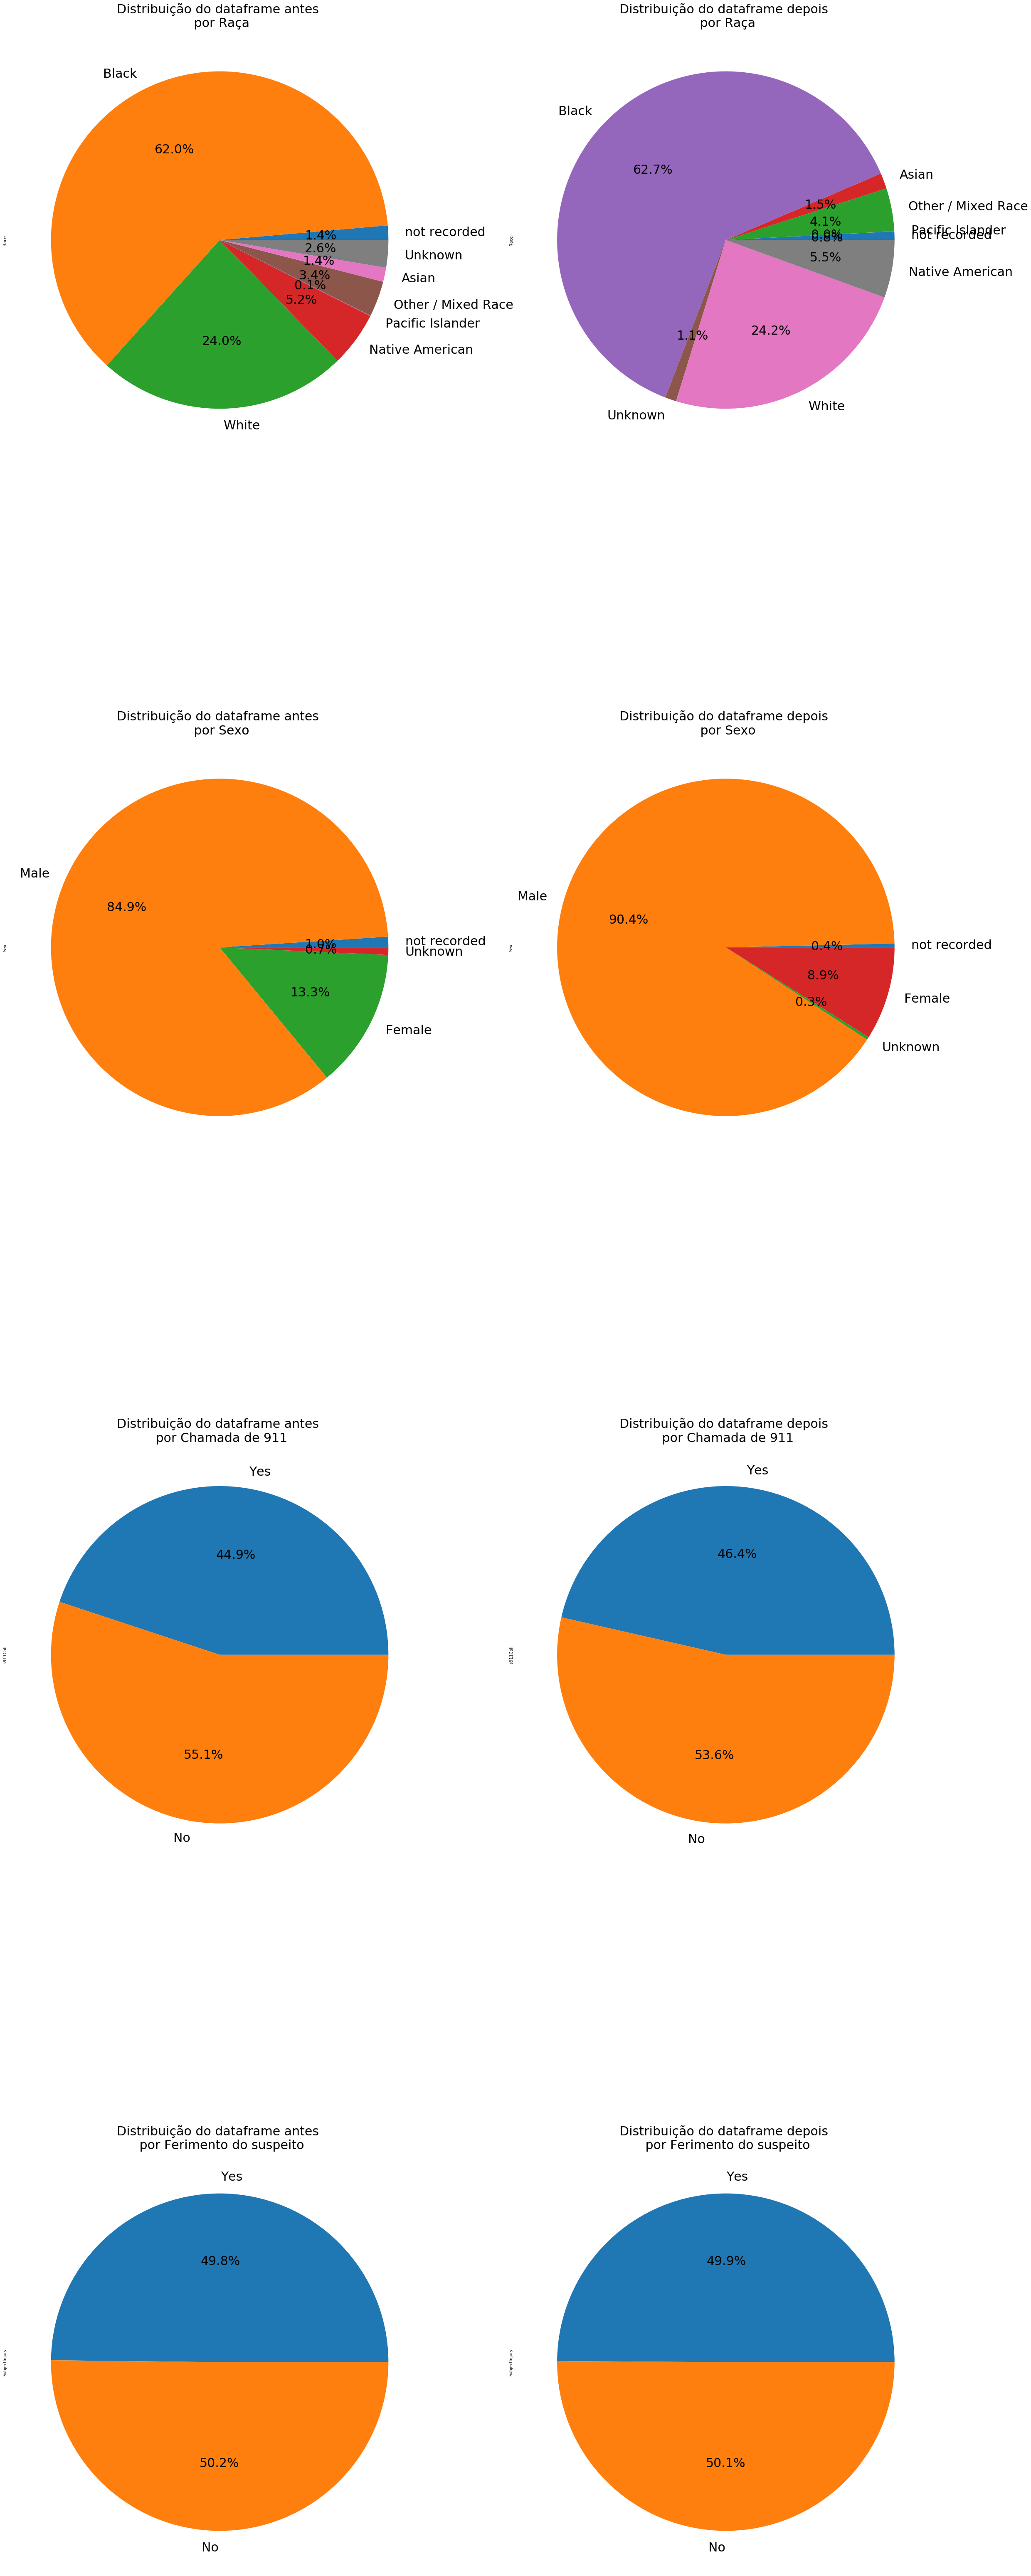

In [305]:
# Comparando a distribuição de dados antes e depois da remoção das linhas com dados Nan
plt.figure(figsize=(40,120))

# Race
plt.subplot(4,2,1)
police1.Race.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe antes \n por Raça', fontsize=30)

plt.subplot(4,2,2)
police2.Race.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe depois \n por Raça', fontsize=30)

# Sex
plt.subplot(4,2,3)
police1.Sex.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe antes \n por Sexo', fontsize=30)

plt.subplot(4,2,4)
police2.Sex.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe depois \n por Sexo', fontsize=30)

# Is911Call
plt.subplot(4,2,5)
police1.Is911Call.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe antes \n por Chamada de 911', fontsize=30)

plt.subplot(4,2,6)
police2.Is911Call.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe depois \n por Chamada de 911', fontsize=30)

# SubjectInjury
plt.subplot(4,2,7)
police1.SubjectInjury.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe antes \n por Ferimento do suspeito', fontsize=30)

plt.subplot(4,2,8)
police2.SubjectInjury.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe depois \n por Ferimento do suspeito', fontsize=30)

plt.fontsize=14
plt.show()

**Conclusão:** A limpeza acima não interfere significativamente nos resultados, como pode ser observado pelos gráficos de pizza.

**Depois de analisar os dados, percebe-se que os valores não mudam significativamente depois da limpeza dos valores Nan. Logo, a limpeza mostra-se proveitosa.**

In [306]:
# Frequência de cada tipo de força da target
police2['ForceType'].value_counts(True)

Bodily Force                   0.760461
Taser                          0.128024
Chemical Irritant              0.054719
Gun Point Display              0.018949
Improvised Weapon              0.016457
Police K9 Bite                 0.013965
Baton                          0.002855
Firearm                        0.002180
Maximal Restraint Technique    0.001454
Less Lethal Projectile         0.000831
Less Lethal                    0.000104
Name: ForceType, dtype: float64

In [307]:
# Listando os tipos de forças usados por policiais
lista_ft = []
for name in list(police2['ForceType']):
    if name not in lista_ft:
        lista_ft.append(name)
        
lista_ft

['Bodily Force',
 'Chemical Irritant',
 'Taser',
 'Improvised Weapon',
 'Baton',
 'Police K9 Bite',
 'Firearm',
 'Less Lethal Projectile',
 'Gun Point Display',
 'Maximal Restraint Technique',
 'Less Lethal']

### Análise Expoloratória 

Para uma análise inicial, iremos comparar a popolução da cidade com o tipo de força usado em ações policiais. Para essa análise inicial foram considerados dados raciais da cidade de Mineapolis do ano de 2010, apenas para começarmos nossa análise.

In [308]:
# Dados censo 2010
census_2010 = {'Asian': '0.061', 'Black': '0.194', 'Native American': '0.014', 'Other / Mixed Race': '0.152', 'White': '0.638'}
census_2010_df = pd.DataFrame.from_dict(census_2010, orient='index')
census_2010_df.columns = ['Percentage']
census_2010_df['Percentage'] = census_2010_df['Percentage'].astype(float)

In [309]:
census_2010_df = census_2010_df.sort_index(ascending=True)
census_2010_df.style.background_gradient(cmap='Purples', subset=['Percentage'])

,Percentage
Asian,0.061
Black,0.194
Native American,0.014
Other / Mixed Race,0.152
White,0.638


In [310]:
# Tipo de força com base na raça do indivíduo, informação retirada da base de dados
force_race = police2.groupby(['Race'])[['ForceType']].count().reset_index()
force_race['ForceType'] = force_race['ForceType']/len(police2['ForceType'])
force_race.sort_values(by='ForceType', ascending=False).style.background_gradient(cmap='summer', subset=['ForceType'])

,Race,ForceType
1,Black,0.627193
6,White,0.242394
2,Native American,0.0552902
3,Other / Mixed Race,0.041273
0,Asian,0.0149517
5,Unknown,0.0106427
7,not recorded,0.00815076
4,Pacific Islander,0.000103831


In [311]:
# Relação entre a raça e a quantidade de agressões policiais
tmp = force_race[force_race.Race != 'Unknown'].copy()
tmp.loc[~tmp.Race.isin(['White','Black','Asian','Native American']), 'Race'] = 'Other / Mixed Race'
tmp = tmp.groupby(['Race'], as_index=False)['ForceType'].sum()
tmp

,Race,ForceType
0,Asian,0.014952
1,Black,0.627193
2,Native American,0.055290
3,Other / Mixed Race,0.049528
4,White,0.242394


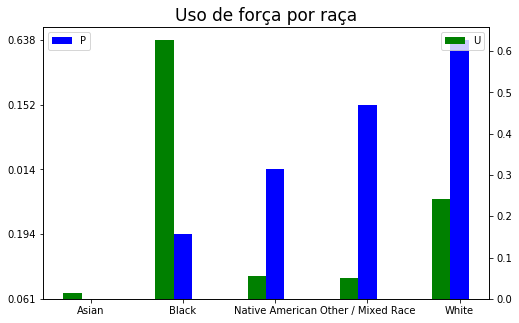

In [312]:
# Plotando um gráfico para melhor visualizarmos essa relação:
X = np.arange(len(census_2010_df))
plt.rcParams['xtick.labelsize'] = 10 # Definindo tamanho da fonte do título do eixo x
plt.rcParams['ytick.labelsize'] = 10 # Definindo tamanho da fonte do título do eixo y
plt.figure(figsize=(8, 5)) # Definindo tamanho do gráfico
ax = plt.subplot(111)
ax.bar(X, census_2010.values(), width=0.2, color='b', align='center') # Quantidade de indivíduos por raça
ax2 = ax.twinx()
ax2.bar(X-0.2, tmp.ForceType, width=0.2, color='g', align='center') # Relação entre raça e força policial
ax.legend('População')
ax2.legend('Uso de força')
plt.xticks(X, census_2010.keys())
plt.title("Uso de força por raça", fontsize=17)
plt.show()

# P: Gráfico que representa quantidade de indivíduos por raça
# U: Gráfico que representa relação entre raça e força policial

**Conclusão:** Graficamente, é possível perceber que na cidade de Mineapolis existem muito mais brancos que qualquer outra raça, sendo negros a minoria. Em contrapartida, mesmo os negros sendo minoria, são ele os que sofrem mais agressões policiais se comparados a qualquer outra raça no gráfico.

In [313]:
# Análise de indivíduos pelo tipo de raça
police2['Race'].value_counts()

Black                 12081
White                  4669
Native American        1065
Other / Mixed Race      795
Asian                   288
Unknown                 205
not recorded            157
Pacific Islander          2
Name: Race, dtype: int64

## Verificando, graficamente, como se comporta a target

In [314]:
# Plotando um gráfico para melhor analisar a target ForceType
# Data:
labels = lista_ft
frequency = []
for i in lista_ft:
    frequency.append(police2['ForceType'].value_counts()[i])

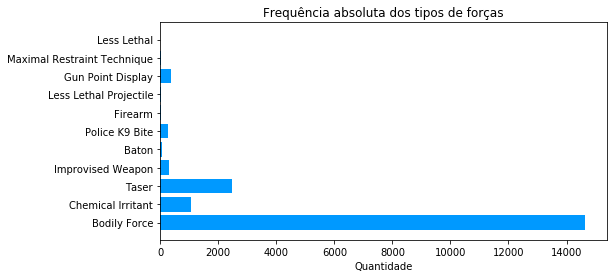

In [315]:
# Plot template
plt.figure(figsize=(8,4))
plt.title('Frequência absoluta dos tipos de forças'); plt.xlabel('Quantidade')
# Plot 
plt.barh(labels, frequency, color='#0099ff')
plt.show()

**Conclusão:** Pelo gráfico acima, é possível identificar que o tipo de violência policial mais comum é a causada por força corporal.

## Análise qualitativa da feature Race e a target ForceType

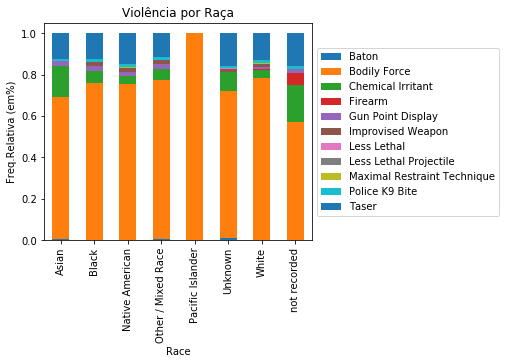

In [316]:
#Analisando a frequência do tipo de violência (target ForceType) considerando Raça (feature Race):
cross = pd.crosstab(police2["Race"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Violência por Raça')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

*O gráfico permite entender que BodilyForce é o tipo mais comum de violência policial entre as raças.*

## Análise qualitativa da feature Sex e a target ForceType

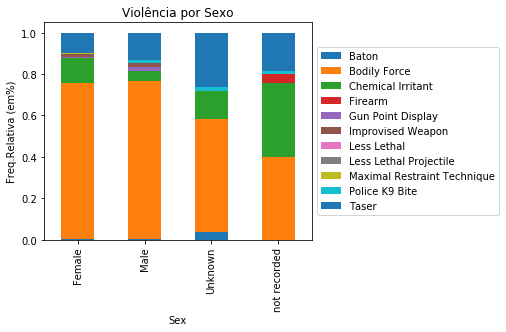

In [317]:
#Analisando a frequência do tipo de violência (target ForceType) considerando Sexo (feature Sex):
cross = pd.crosstab(police2["Sex"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Violência por Sexo')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Análise qualitativa da feature Precinct e a target ForceType

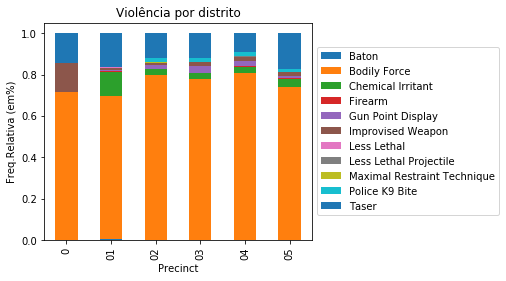

In [318]:
#Analisando a frequência do tipo de violência (target ForceType) considerando Distrito (feature Precinct):
cross = pd.crosstab(police2["Precinct"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Violência por distrito')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Análise qualitativa da feature SubjectInjury e a target ForceType

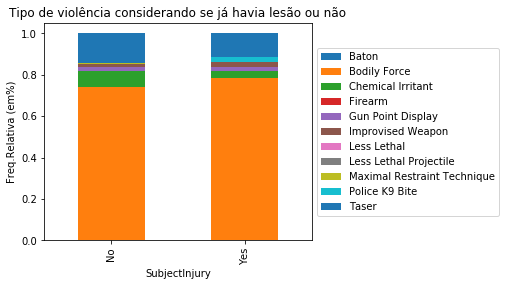

In [319]:
#Analisando a frequência do tipo de violência (target ForceType) considerando SubjectInjury (feature SubjectInjury):
cross = pd.crosstab(police2["SubjectInjury"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Tipo de violência considerando se já havia lesão ou não')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Conclusão:** Os gráficos acima permitiram concluir que o tipo de força *Bodily Force* é o tipo mais comum de atitulde policial, representando uma frequência maior em determinadas raças, como se pode ver no primeiro gráfico, em homens, nos distritos 02 e 03 e em pessoas quem já tinham algum tipo de lesão antes da abordagem policial.

## Análise de Features Quantitativas 

In [320]:
# Analisando informações sobre as variáveis quantitativas da base de dados
lista_col = ['EventAge', 'TotalCityCallsForYear', 'TotalPrecinctCallsForYear', 'TotalNeighborhoodCallsForYear']

police_medidas = pd.DataFrame(police2[lista_col]).describe()
police_medidas.index = ['Quantidade total', 
                         'Média', 
                         'Desvio Padrão', 
                         'Valor mínimo', 
                         'Quartil (25%)', 
                         'Quartil (50%)', 
                         'Quartil (75%)', 
                         'Valor máximo']

police_medidas.round(3)

,EventAge,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
Quantidade total,19262.000,19262.000,19262.000,19262.000
Média,28.961,331406.711,68479.912,11843.347
Desvio Padrão,10.391,26147.818,14067.533,9963.223
Valor mínimo,0.000,210034.000,3422.000,203.000
Quartil (25%),21.000,314926.000,53956.000,5139.000
Quartil (50%),27.000,322402.000,74407.000,8466.000
Quartil (75%),35.000,351659.000,80422.000,14049.000
Valor máximo,82.000,380794.000,90815.000,38522.000


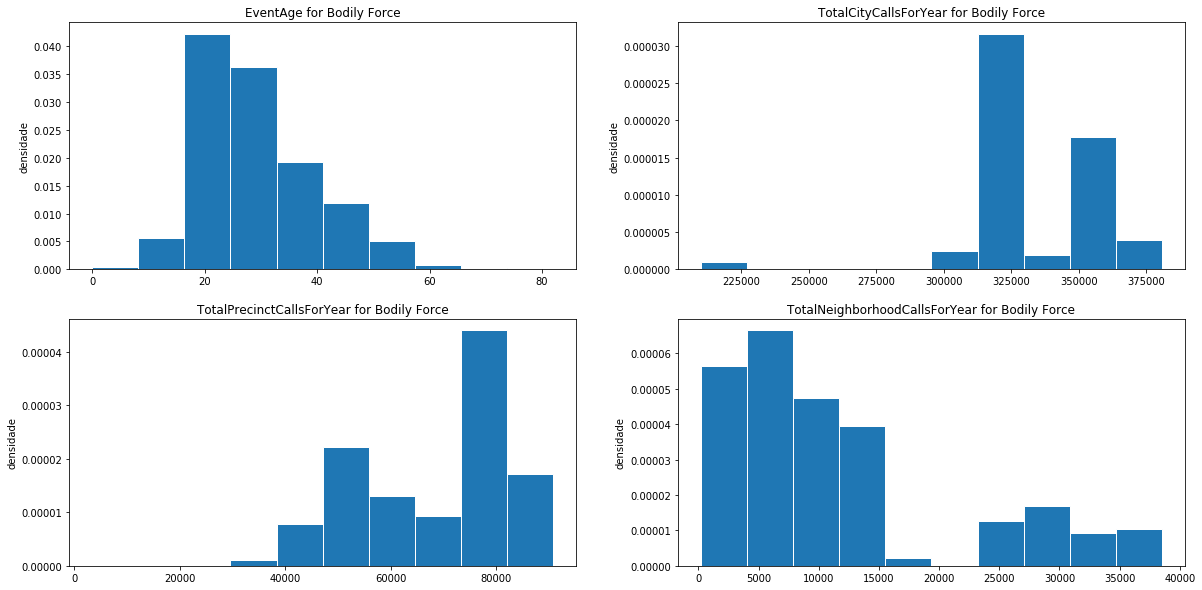

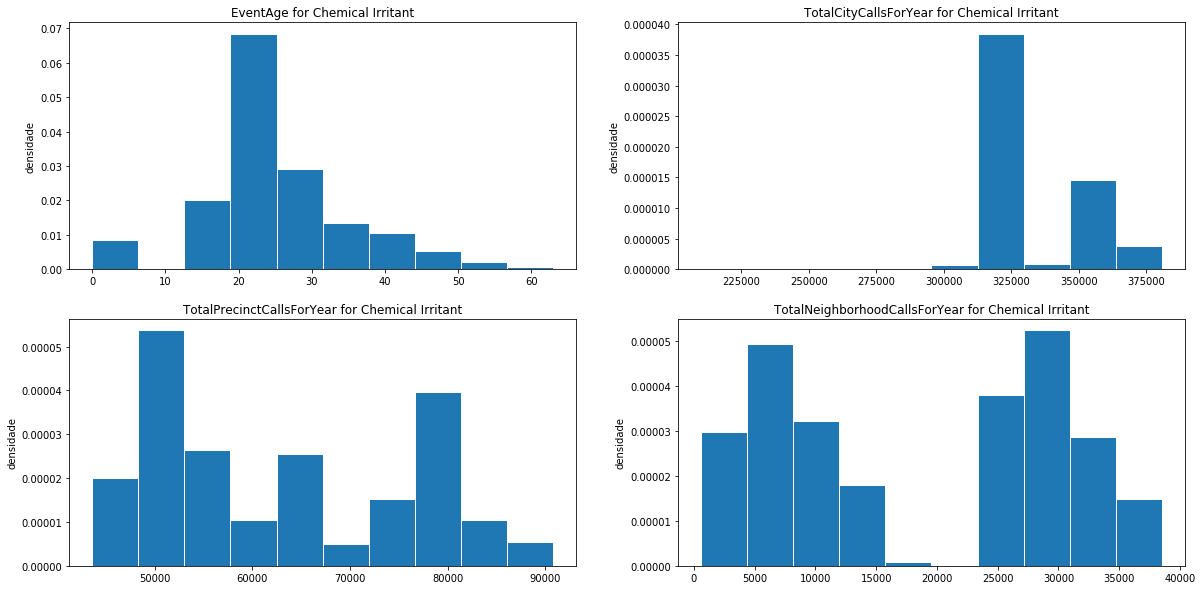

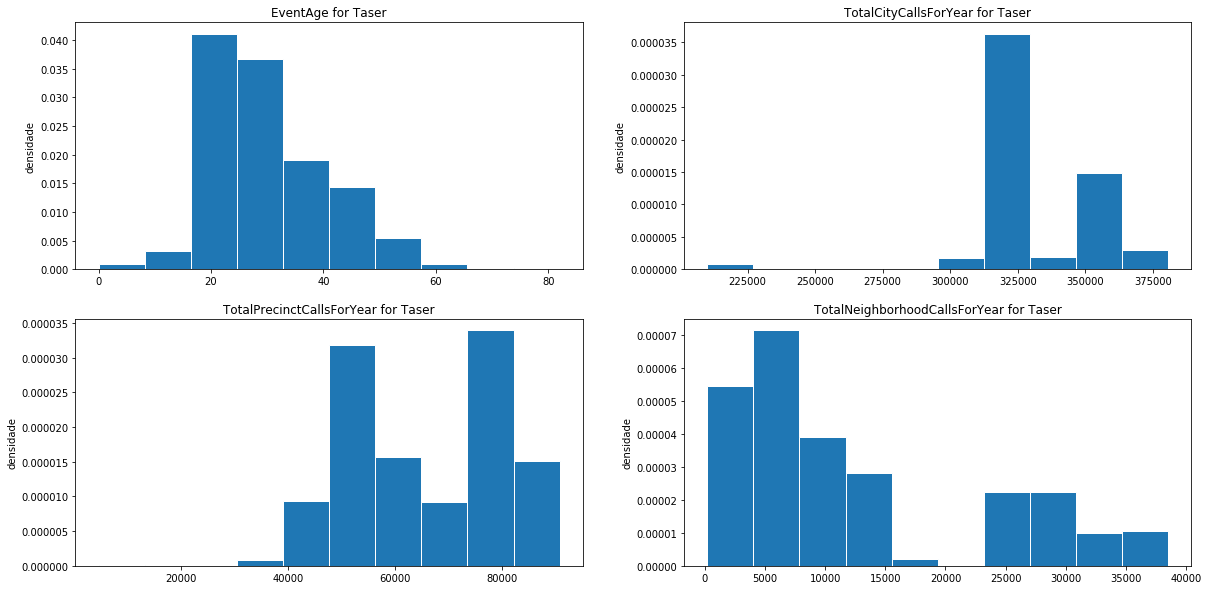

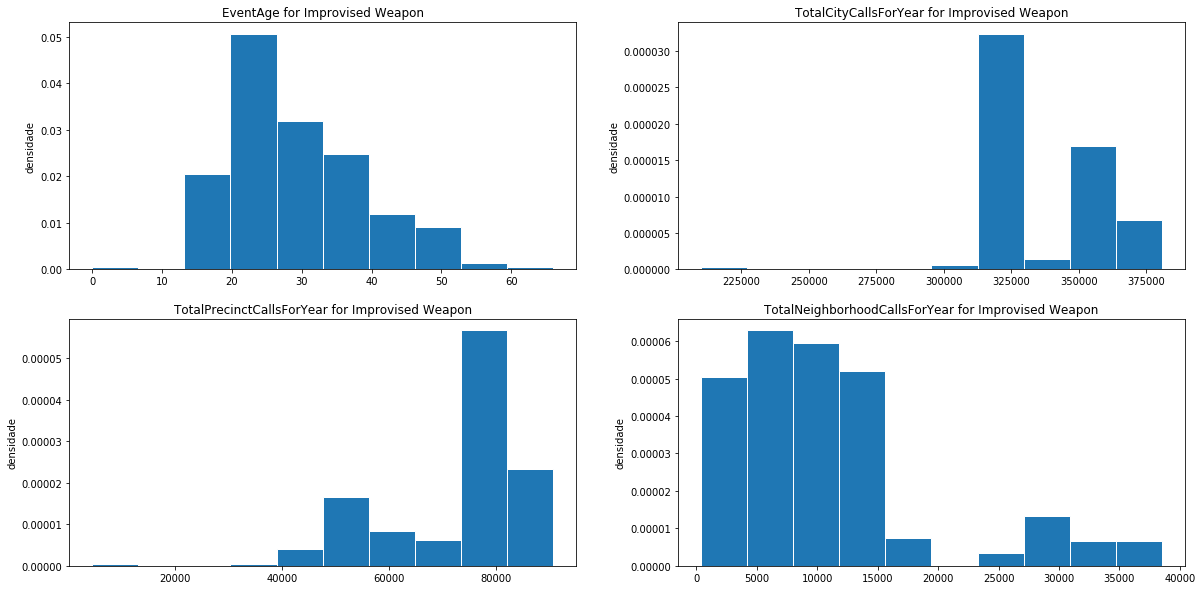

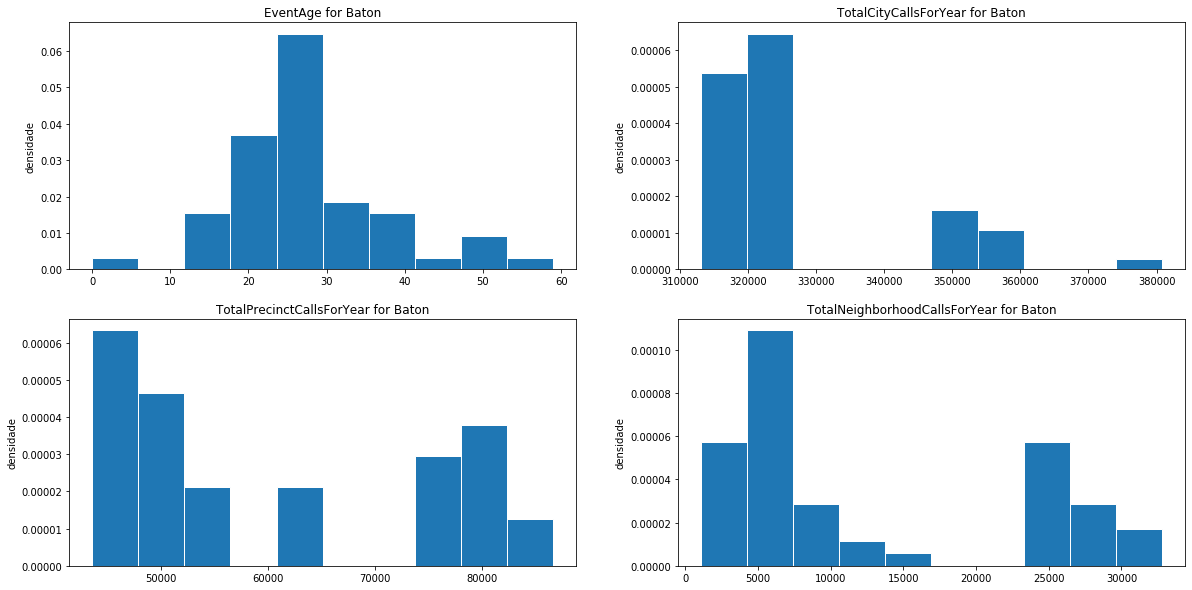

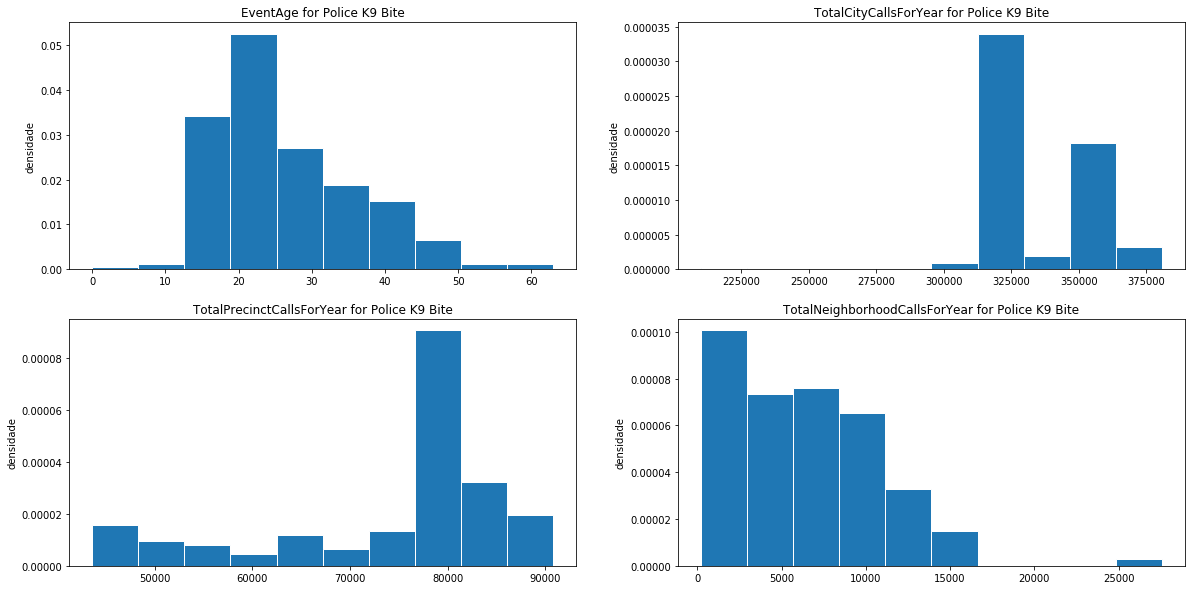

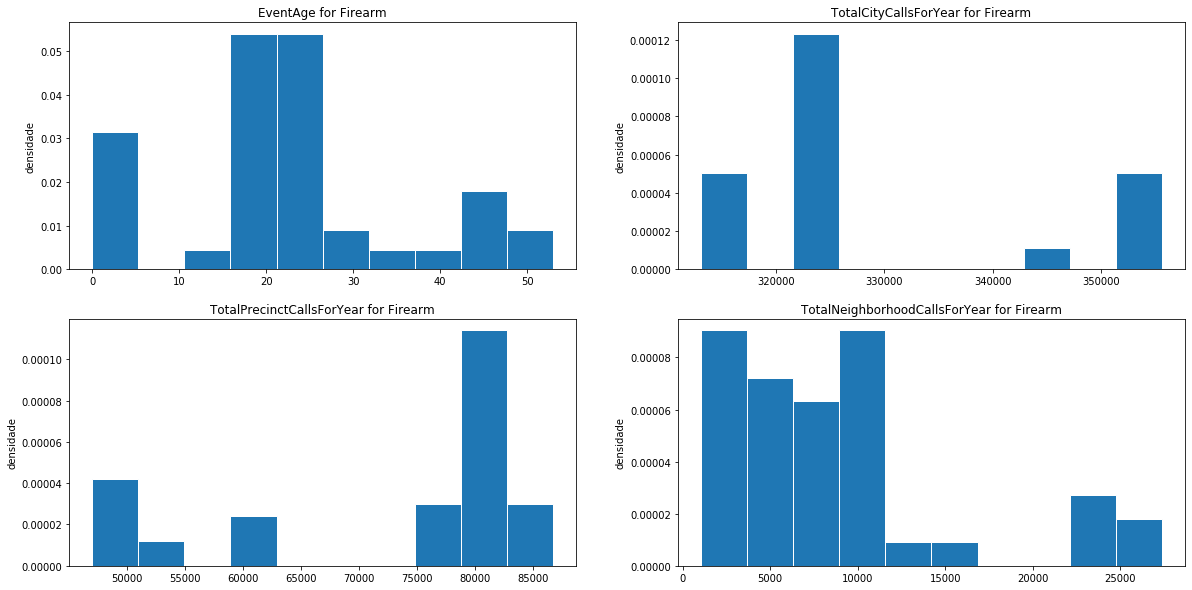

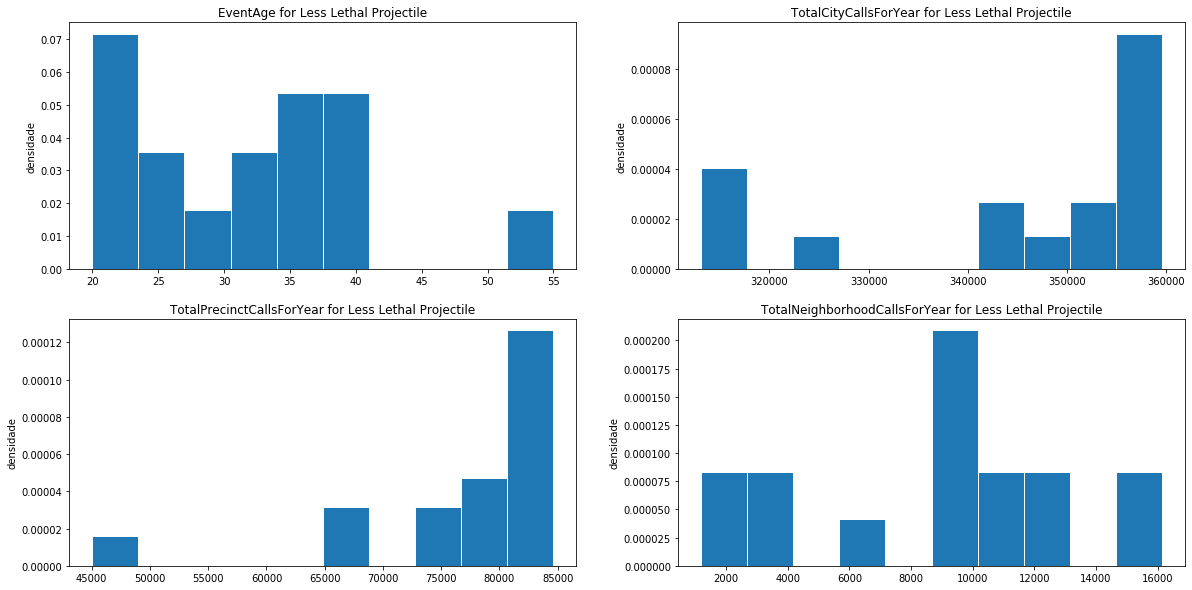

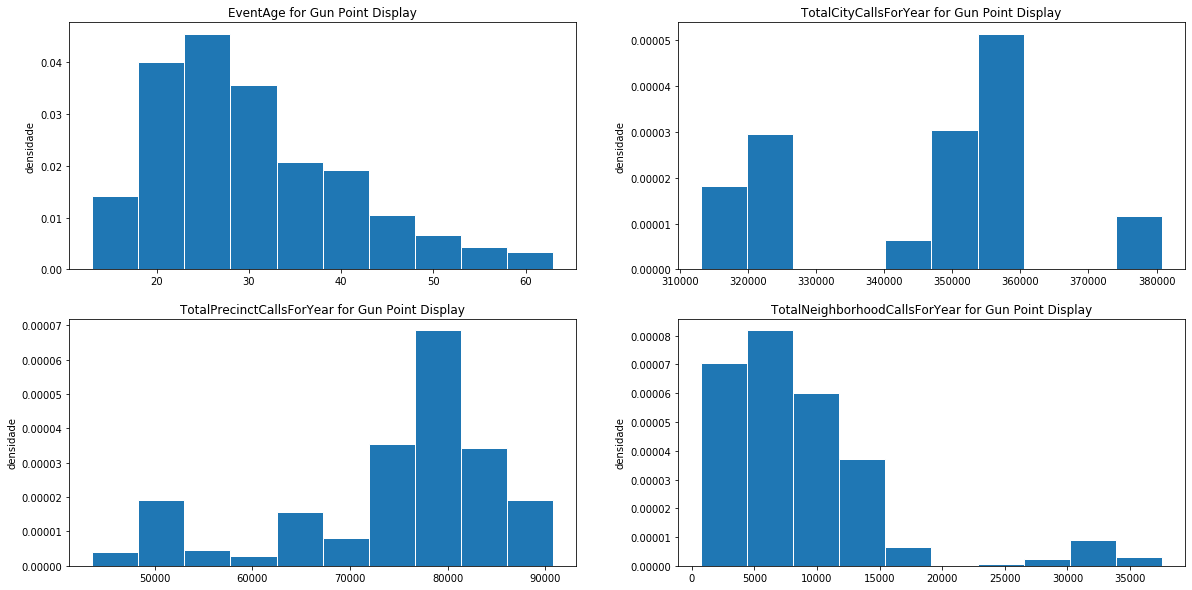

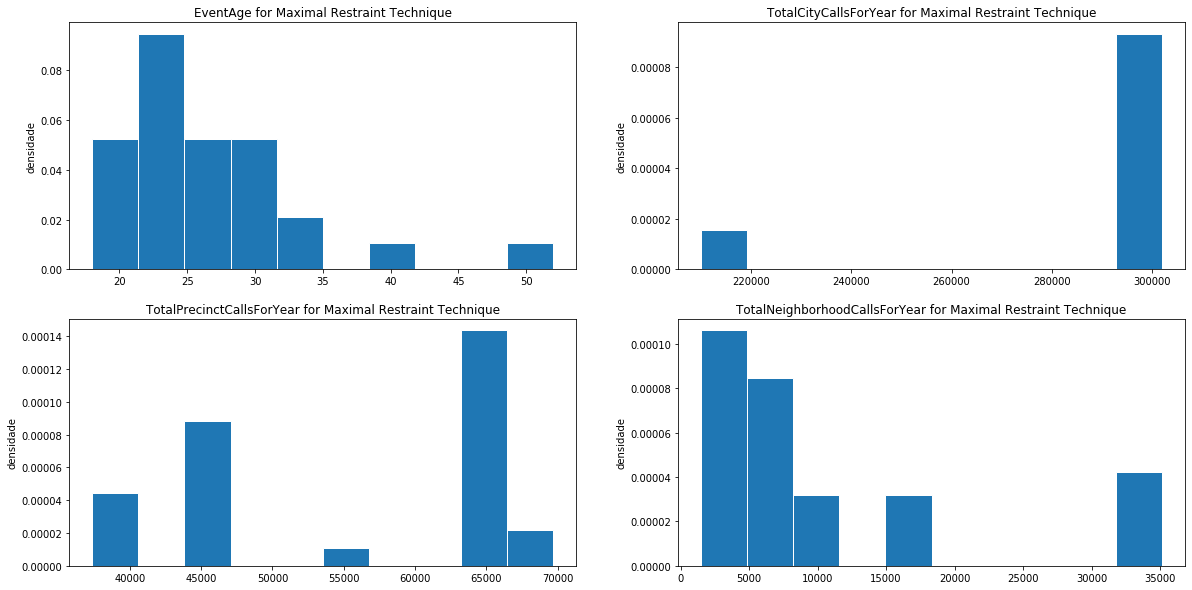

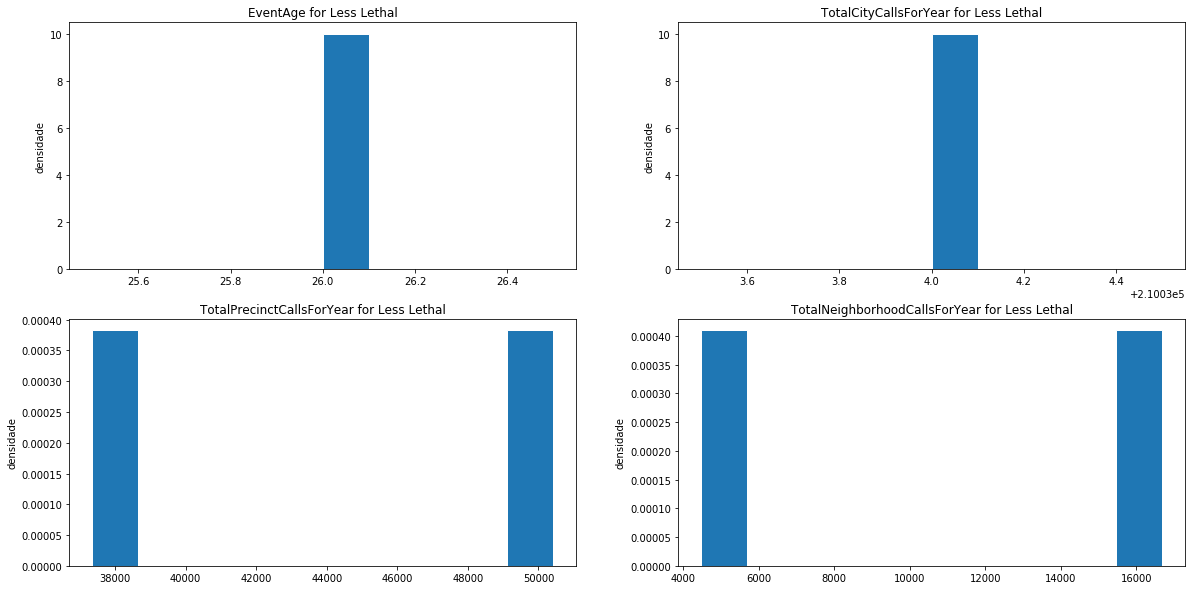

In [321]:
# Verificando graficamente a relação entre as variáveis quantitativas e cada tipo de força da target ForceType
for ft in lista_ft:
    
    plt.figure(figsize=(20, 10))
    
    df_ = police2.loc[police2['ForceType'] == ft, :]
# Gráfico para EventAge
    plt.subplot(221)
    plt.hist(df_.EventAge, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('EventAge for {}'.format(ft))
# Gráfico para TotalCityCallsForYear   
    plt.subplot(222)
    plt.hist(df_.TotalCityCallsForYear, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('TotalCityCallsForYear for {0}'.format(ft))
# Gráfico para TotalPrecinctCallsForYear    
    plt.subplot(223)
    plt.hist(df_.TotalPrecinctCallsForYear, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('TotalPrecinctCallsForYear for {}'.format(ft))
# Gráfico para TotalNeighborhoodCallsForYear    
    plt.subplot(224)
    plt.hist(df_.TotalNeighborhoodCallsForYear, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('TotalNeighborhoodCallsForYear for {}'.format(ft))

    plt.show()

**Conclusão:** Cada variável quantitativa tem um efeito diferente sobre cada tipo força da target, mostrando que há mais ocorrência de cada tipo em determinados valores de cada variável quantitativa.

# Pré processamento

Para iniciar o pre processamento, foi necessário tranformar variáveis quantitativas em qualitativas e usar sub-categorias para cada categoria existente da base de dados inicial. Para isso foi usada a função dummies.
Fonte: https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

In [322]:
police3 = pd.get_dummies(police2, prefix=['Prob', '911', 'PriOff', 'SubInj', 'Race', 'Sex', 'TyOfRes', 'Precinct', 'Nbh'], columns=['Problem', 'Is911Call', 'PrimaryOffense', 'SubjectInjury', 'Race', 'Sex', 'TypeOfResistance', 'Precinct', 'Neighborhood'])

In [323]:
# Separando a feature e as targets
X = police3.iloc[:, 1:].values
y = police3.iloc[:, 0].values

In [324]:
# Trasformando a target em quantitativa
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [325]:
# Separando base de treinamento e base de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [326]:
# Normalizando as variáveis quantitativas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:4] = sc.fit_transform(X_train[:, 0:4])
X_test[:, 0:4] = sc.transform(X_test[:, 0:4])

# Modelos

# Regressão Logística

**Principais diferenças entre o modelo de regressão linear e o modelo regressão logística**

* Primeira diferença: Trançando um gráfico de dispersão em que aparece uma variável dependente e uma independente, ou seja, criando uma nuvem de pontos, na regressão linear será traçada uma reta que visa alcançar a maior quantidade de pontos possíveis, enquanto na regressão na regressão logística será traçada uma curva.
* Segunda diferença: Na regressão linear, a variável dependente é contínua, enquanto na logística, a variável dependente é uma variável categórica, que pode assumir um conjunto limitado de possibilidades (no caso do nosso modelo, pode assumir valores delimitados pela target *ForceType*).

**Intuito da Regressão Logística**

* Modelar a probabilidade de um evento ocorrer dependendo do valor das variáveis dependentes;
* Estimar a probabilidade de um evento ocorrer e de não ocorrer;
* Prever o efeito de uma série de variáveis em uma variável de resposta binária;
* Classificar as observações estimando a probabilidade de uma observação estar em categórica ou não.

Uma matriz de confusão compara os resultados reais com os resultados previstos.

Fonte: [site medium](https://medium.com/@gabriel.stankevix/regress%C3%A3o-log%C3%ADstica-em-r-e-python-pytools-9f4eba2061a1#:~:text=A%20Regress%C3%A3o%20Log%C3%ADstica%20tenta%3A,que%20o%20evento%20n%C3%A3o%20ocorra)

*No nosso modelo iremos utilizar a regressão logística da biblioteca Sklearn LogisticRegression*

**Testando modelo de Regressão Logística**

In [327]:
# Modelo logístico
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
modelo_logistic = classifier.fit(X_train, y_train)
modelo_logistic

LogisticRegression(random_state=0)

In [328]:
# Previsão do modelo
y_pred = classifier.predict(X_test)
array_logistic = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
df_logistic = pd.DataFrame(array_logistic, columns=['Prediction', 'Test'])

In [329]:
# Fazendo a matriz de confusão e vendo a acurácia do modelo usado
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm_logistic = confusion_matrix(y_test, y_pred)

log_ac = []
ac = accuracy_score(y_test, y_pred)
log_ac.append(ac)

**Matriz de Confusão**

Compara os resultados reais com os resultados previstos. As linhas são os resultados reais e as colunas são os resultados previstos.
Fonte: [site medium](https://medium.com/@gabriel.stankevix/regress%C3%A3o-log%C3%ADstica-em-r-e-python-pytools-9f4eba2061a1#:~:text=A%20Regress%C3%A3o%20Log%C3%ADstica%20tenta%3A,que%20o%20evento%20n%C3%A3o%20ocorra)

No projeto, foi feito um mapa de calor para uma melhor visualização dos dados usando a biblioteca do *skelearn.metrics*, seguindo a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

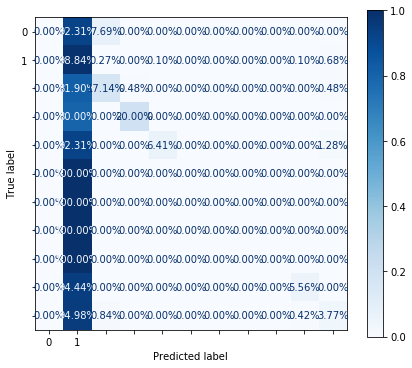

In [330]:
# Fazendo um mapa de calor para representar os dados da matriz de confusão:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_logistic, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%');

Os resultados do 2º e 4º quadrantes representa os resultados os quais o modelo acertou a previsão.

# Decision Tree

**Uma árvore como forma de realizar uma predição**

Em uma árvore, o primeiro nó é chamado de raiz e os nós que não têm descendentes são chamados de folhas (resultado da predição), já as linhas que ligam os nós são chamadas de ramos.

Em uma árvore de decisão, a raiz representa o dataset inteiro e cada ramo equivale a uma decisão. Para um dataset, as perguntas são feitas sobre os valores das features. O processo é realizado para todo o conjunto de dados gerado pelas divisões. A análise termina quando todos os caminhos são percorridos.

Fonte: [site medium](https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05)

**Testando modelo Decision Tree**

In [331]:
# Modelo Decision Tree:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo_tree = classifier.fit(X_train, y_train)

In [332]:
# Previsão do modelo:
y_pred = classifier.predict(X_test)

In [333]:
# Acurácia do modelo:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_tree = confusion_matrix(y_test, y_pred)

dec_ac = []
ac = accuracy_score(y_test, y_pred)
dec_ac.append(ac)
ac

0.7472099662600571

**Mapa de Calor**

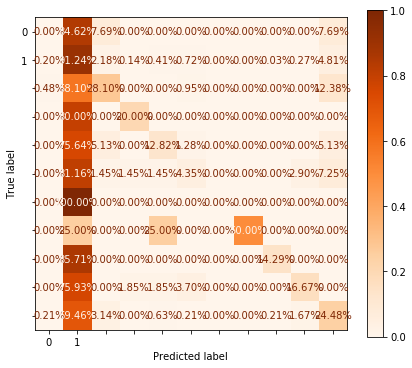

In [334]:
# Fazendo um mapa de calor para representar os dados da matriz de confusão:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_tree, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Oranges, ax=ax, values_format='.2%');

# Random Forest

O modelo treina várias árvores de decisão que não estão correlacionadas e que são obtidas a partir da amostra do dataset, e fazer predições que mais aparecem em caso de um preblema de classificação, ou a média dos valores obridos da regressão.
Fonte: [site medium](https://medium.com/turing-talks/turing-talks-18-modelos-de-predi%C3%A7%C3%A3o-random-forest-cfc91cd8e524)

In [335]:
# Modelo random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelo_random = classifier.fit(X_train, y_train)

In [336]:
# Previsão do modelo
y_pred = classifier.predict(X_test)

In [337]:
# Acurácia do modelo
from sklearn.metrics import confusion_matrix, accuracy_score
cm_random = confusion_matrix(y_test, y_pred)

ran_ac = []
ac = accuracy_score(y_test, y_pred)
ran_ac.append(ac)
ac

0.7412405917466909

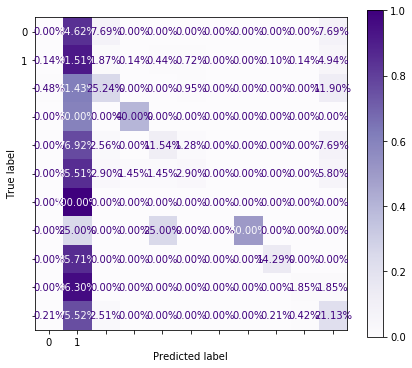

In [338]:
# Fazendo um mapa de calor para representar os dados da matriz de confusão:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_random, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Purples, ax=ax, values_format='.2%');

## Tentando melhorar o desempenho 

Trocaremos os ForceType que não são Bodily Force por uma categoria só, pois como foi observado em nossas primeiras análise, Bodily Force representa uma frequência muito maior de ForceType se comparada com os outros tipos de atitudes policiais. Desse modo, visamos melhorar o desempenho juntando as atitudes menos relevantes em uma única categoria.

In [341]:
# Filtrando linhas dos que são BodilyForce e dos que não são
filtra_linhas = police3['ForceType'] != 'Bodily Force'
filtra_linhas2 = police3['ForceType'] == 'Bodily Force'
df_auxiliar = police3.loc[filtra_linhas, :]
df_auxiliar2 = police3.loc[filtra_linhas2, :]

df_auxiliar['ForceType'] = 'Weapon'

police4 = pd.concat([df_auxiliar, df_auxiliar2]).sort_index()

In [342]:
# Fazendo os mesmos passos de pré processamento feitos anteriormente:
X = police4.iloc[:, 1:].values
y = police4.iloc[:, 0].values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:4] = sc.fit_transform(X_train[:, 0:4])
X_test[:, 0:4] = sc.transform(X_test[:, 0:4])

 #### Tentando Logistico mais uma vez

In [343]:
# Mesmos passos feitos anteriormente, mas agora apenas com duas categorias de ForceType
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
modelo_logistic_novo = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
array_logistic = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
df_logistic = pd.DataFrame(array_logistic, columns=['Prediction', 'Test'])
df_logistic

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
log_ac.append(ac)
ac

0.7713470023358422

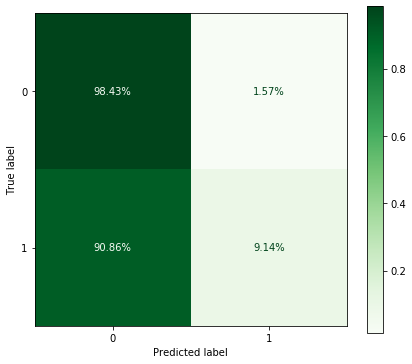

In [344]:
# Mapa de calor:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_logistic_novo, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Greens, ax=ax, values_format='.2%');

Os resultados do 2º e 4º quadrantes representa os resultados os quais o modelo acertou a previsão.

#### Tentando Decision Tree de novo

In [346]:
# Mesmos passos feitos anteriormente, mas agora apenas com duas categorias de ForceType
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo_tree_novo = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
dec_ac.append(ac)
ac

0.7700493122242409

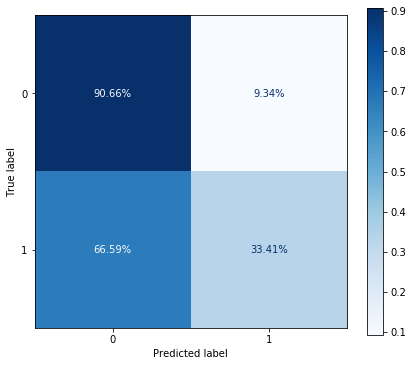

In [347]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_tree_novo, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%');

##### Tentando Random Forest de novo

In [348]:
# Mesmos passos feitos anteriormente, mas agora apenas com duas categorias de ForceType
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelo_forest_novo = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
ran_ac.append(ac)
ac

0.7539579548403841

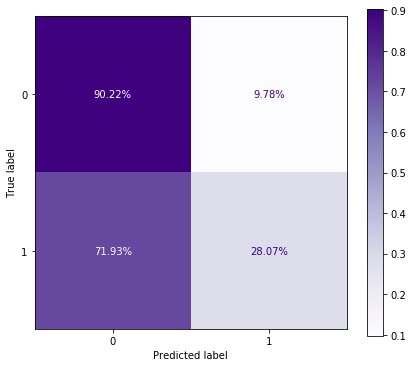

In [349]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_forest_novo, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Purples, ax=ax, values_format='.2%');

## Testando o cálculo de feature importance 

Defindo as variáveis que são mais importantes para o acontecimento da target. Desse modo, poderemos trabalhar o modelo apenas com a features mais importantes para a target, desconsiderando aquelas com pouca relevância para o acontecimento da target. Desse modo, visamos melhorar o desempenho do modelo.

### Com todos os ForceType

Primeiro testaremos com todas as categorias de ForceType, seguindo os mesmos passos de processamento mas agoras apenas com a features realmente relevantes.

**Mesmos passos de pré processamento**

In [350]:
X = police3.iloc[:, 1:].values
y = police3.iloc[:, 0].values

In [351]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [352]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0:4] = sc.fit_transform(X[:, 0:4])

##### Logistic Regression


Calculando as variáveis mais importantes e verificando a acurácia.

In [353]:
logreg = LogisticRegression()
logreg.fit(X, y)

norm =  np.linalg.norm(logreg.coef_[0])
log_odds = logreg.coef_[0]/norm

df1 = pd.DataFrame(log_odds, police3.iloc[:, 1:].columns, columns=['feature_importance']).sort_values(by='feature_importance', ascending=False)
df1['nome'] = police3.columns[1:]

In [354]:
# Filtrando linhas com alto grau de importância:
filtra_linhas = df1['feature_importance'] > 0.1 
df2 = df1.loc[filtra_linhas, :]

features_list = []
for feat in df2['nome']:
    features_list.append(feat)
    
features_list.append('ForceType')

police9 = police3[features_list].copy()


In [355]:
X = police9.iloc[:, :-1].values
y = police9.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
modelo_logistic_novo = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
ac = accuracy_score(y_test, y_pred)
log_ac.append(ac)
ac

0.761484557487672

##### Decision Tree

In [356]:
X = police3.iloc[:, 1:].values
y = police3.iloc[:, 0].values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0:4] = sc.fit_transform(X[:, 0:4])

clf = DecisionTreeClassifier()
clf.fit(X, y)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)

In [357]:
# Fazendo um data frame com o nome das suas colunas e suas respectivas importâncias
df3 = pd.DataFrame()
df3['feature_importance'] = feat_importance
df3['nome'] = police3.columns[1:]

In [358]:
filtra_linhas = df3['feature_importance'] > 0.003 
df4 = df3.loc[filtra_linhas, :]

features_list = []
for feat in df4['nome']:
    features_list.append(feat)
    
features_list.append('ForceType')

police5 = police3[features_list].copy()


In [359]:
X = police5.iloc[:, :-1].values
y = police5.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo_tree_2 = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
ac = accuracy_score(y_test, y_pred)
dec_ac.append(ac)
ac

0.7357902932779652

#### Random forest

In [360]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# get importance
feat_importance = modelo_random.feature_importances_

df1 = pd.DataFrame()
df1['feature_importance'] = feat_importance
df1['nome'] = police3.columns[1:]


filtra_linhas = df1['feature_importance'] > 0.001 
df2 = df1.loc[filtra_linhas, :]

features_list = []
for feat in df2['nome']:
    features_list.append(feat)
    
features_list.append('ForceType')

police7 = police3[features_list].copy()

In [361]:
X = police7.iloc[:, :-1].values
y = police7.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelo_random = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_random = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
ran_ac.append(ac)
ac

0.7399429016350896

### Com apenas 2 ForceType

Agora testaremos apenas com a categoria Bodily Force e a categoria de todas as outras juntas, seguindo os mesmos passos de processamento mas agoras apenas com a features realmente relevantes.

In [362]:
X = police4.iloc[:, 1:].values
y = police4.iloc[:, 0].values

In [363]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [364]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0:4] = sc.fit_transform(X[:, 0:4])

#### Logistic Regression

In [365]:
logreg = LogisticRegression()
logreg.fit(X, y)

norm = np.linalg.norm(logreg.coef_[0])
log_odds = logreg.coef_[0]/norm

df3 = pd.DataFrame(log_odds, police4.iloc[:, 1:].columns, columns=['feature_importance']).sort_values(by='feature_importance', ascending=False)
df3['nome'] = police4.columns[1:]

In [366]:
filtra_linhas = df3['feature_importance'] > 0.1 
df4 = df3.loc[filtra_linhas, :]

features_list = []
for feat in df4['nome']:
    features_list.append(feat)
    
features_list.append('ForceType')

police11 = police4[features_list].copy()


In [367]:
X = police11.iloc[:, :-1].values
y = police11.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
modelo_logistic_novo = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
ac = accuracy_score(y_test, y_pred)
log_ac.append(ac)
ac

0.761484557487672

#### Decision Tree

In [368]:
X = police4.iloc[:, 1:].values
y = police4.iloc[:, 0].values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0:4] = sc.fit_transform(X[:, 0:4])

clf = DecisionTreeClassifier()
clf.fit(X, y)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)


In [369]:
# Fazendo um novo data frame com o nome das colunas e suas respectivas importâncias

df3= pd.DataFrame()
df3['feature_importance'] = feat_importance
df3['nome'] = police4.columns[1:]

In [370]:
filtra_linhas = df3['feature_importance'] > 0.003 
df4 = df3.loc[filtra_linhas, :]

features_list2 = []
for feat in df3['nome']:
    features_list2.append(feat)
    
features_list2.append('ForceType')

police6 = police4[features_list].copy()


In [371]:
X = police6.iloc[:, :-1].values
y = police6.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo_tree_3 = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
ac = accuracy_score(y_test, y_pred)
dec_ac.append(ac)
ac

0.7511030365948611

##### Random Forest

In [372]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# get importance
feat_importance = modelo_forest_novo.feature_importances_

df1 = pd.DataFrame()
df1['feature_importance'] = feat_importance
df1['nome'] = police4.columns[1:]


filtra_linhas = df1['feature_importance'] > 0.001 
df2 = df1.loc[filtra_linhas, :]

features_list = []
for feat in df2['nome']:
    features_list.append(feat)
    
features_list.append('ForceType')

police8 = police4[features_list].copy()

In [373]:
X = police8.iloc[:, :-1].values
y = police8.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelo_forest_novo = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_random = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
ran_ac.append(ac)
ac

0.7565533350635868

## Resultados

In [374]:
log_ac

[0.7690111601349597, 0.7713470023358422, 0.761484557487672, 0.761484557487672]

In [375]:
dec_ac

[0.7472099662600571,
 0.7700493122242409,
 0.7357902932779652,
 0.7511030365948611]

In [376]:
ran_ac

[0.7412405917466909,
 0.7539579548403841,
 0.7399429016350896,
 0.7565533350635868]

In [377]:
resultados= pd.DataFrame(index=['Todos ForceType / Todas Features', 'Dois ForceType / Todas Features', 'Todos ForceType / Features Importantes', 'Dois ForceType / Features Importantes'])
resultados['Logistic Regression'] = log_ac
resultados['Decision Tree'] = dec_ac
resultados['Random Forest'] = ran_ac

resultados

,Logistic Regression,Decision Tree,Random Forest
Todos ForceType / Todas Features,0.769011,0.747210,0.741241
Dois ForceType / Todas Features,0.771347,0.770049,0.753958
Todos ForceType / Features Importantes,0.761485,0.735790,0.739943
Dois ForceType / Features Importantes,0.761485,0.751103,0.756553
